In [1]:
# Install necessary libraries
!pip install -U -q pandas matplotlib seaborn plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import ttest_ind, f_oneway


In [7]:
# Load the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset
file_path = '/content/drive/My Drive/Total_Combine_Dataset1.csv'

# Read the dataset
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully.


In [8]:
# Convert DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M', errors='coerce')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Drop rows with missing values in critical columns
df = df.dropna(subset=['DateTime', 'GHI', 'City'])
print("Dataset after cleaning:\n", df.info())


Missing values in each column:
 DateTime          0
City              0
Temperature       0
DHI               0
DNI               0
Surface Albedo    0
Cloud Type        0
GHI               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806947 entries, 0 to 806946
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DateTime        806947 non-null  datetime64[ns]
 1   City            806947 non-null  object        
 2   Temperature     806947 non-null  float64       
 3   DHI             806947 non-null  float64       
 4   DNI             806947 non-null  float64       
 5   Surface Albedo  806947 non-null  float64       
 6   Cloud Type      806947 non-null  int64         
 7   GHI             806947 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 49.3+ MB
Dataset after cleaning:
 None


In [9]:
# Extract Year, Month, and Season
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Month_Name'] = df['DateTime'].dt.month_name()

# Define seasons
df['Season'] = df['Month'].apply(lambda x: (
    'Winter' if x in [12, 1, 2] else
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Autumn'
))

In [10]:
# Display descriptive statistics for key variables
print(df[['GHI', 'Temperature', 'DHI', 'DNI']].describe())

                 GHI    Temperature            DHI            DNI
count  806947.000000  806947.000000  806947.000000  806947.000000
mean        0.206089       0.568443       0.195971       0.174806
std         0.286555       0.187597       0.266150       0.264650
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       0.456989       0.000000       0.000000
50%         0.002964       0.605978       0.005859       0.000000
75%         0.411055       0.698361       0.368110       0.328874
max         1.000000       1.000000       1.000000       1.000000


<ipython-input-11-457f80c32024>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_ghi.index, y=yearly_ghi.values, palette='coolwarm')


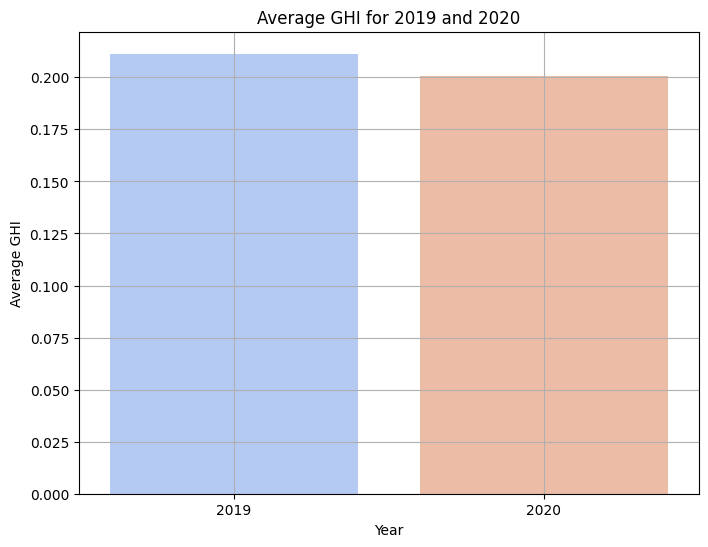

In [11]:
# Group by Year and calculate mean GHI
yearly_ghi = df.groupby('Year')['GHI'].mean()

# Plot yearly GHI
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_ghi.index, y=yearly_ghi.values, palette='coolwarm')
plt.title('Average GHI for 2019 and 2020')
plt.xlabel('Year')
plt.ylabel('Average GHI')
plt.grid()
plt.show()

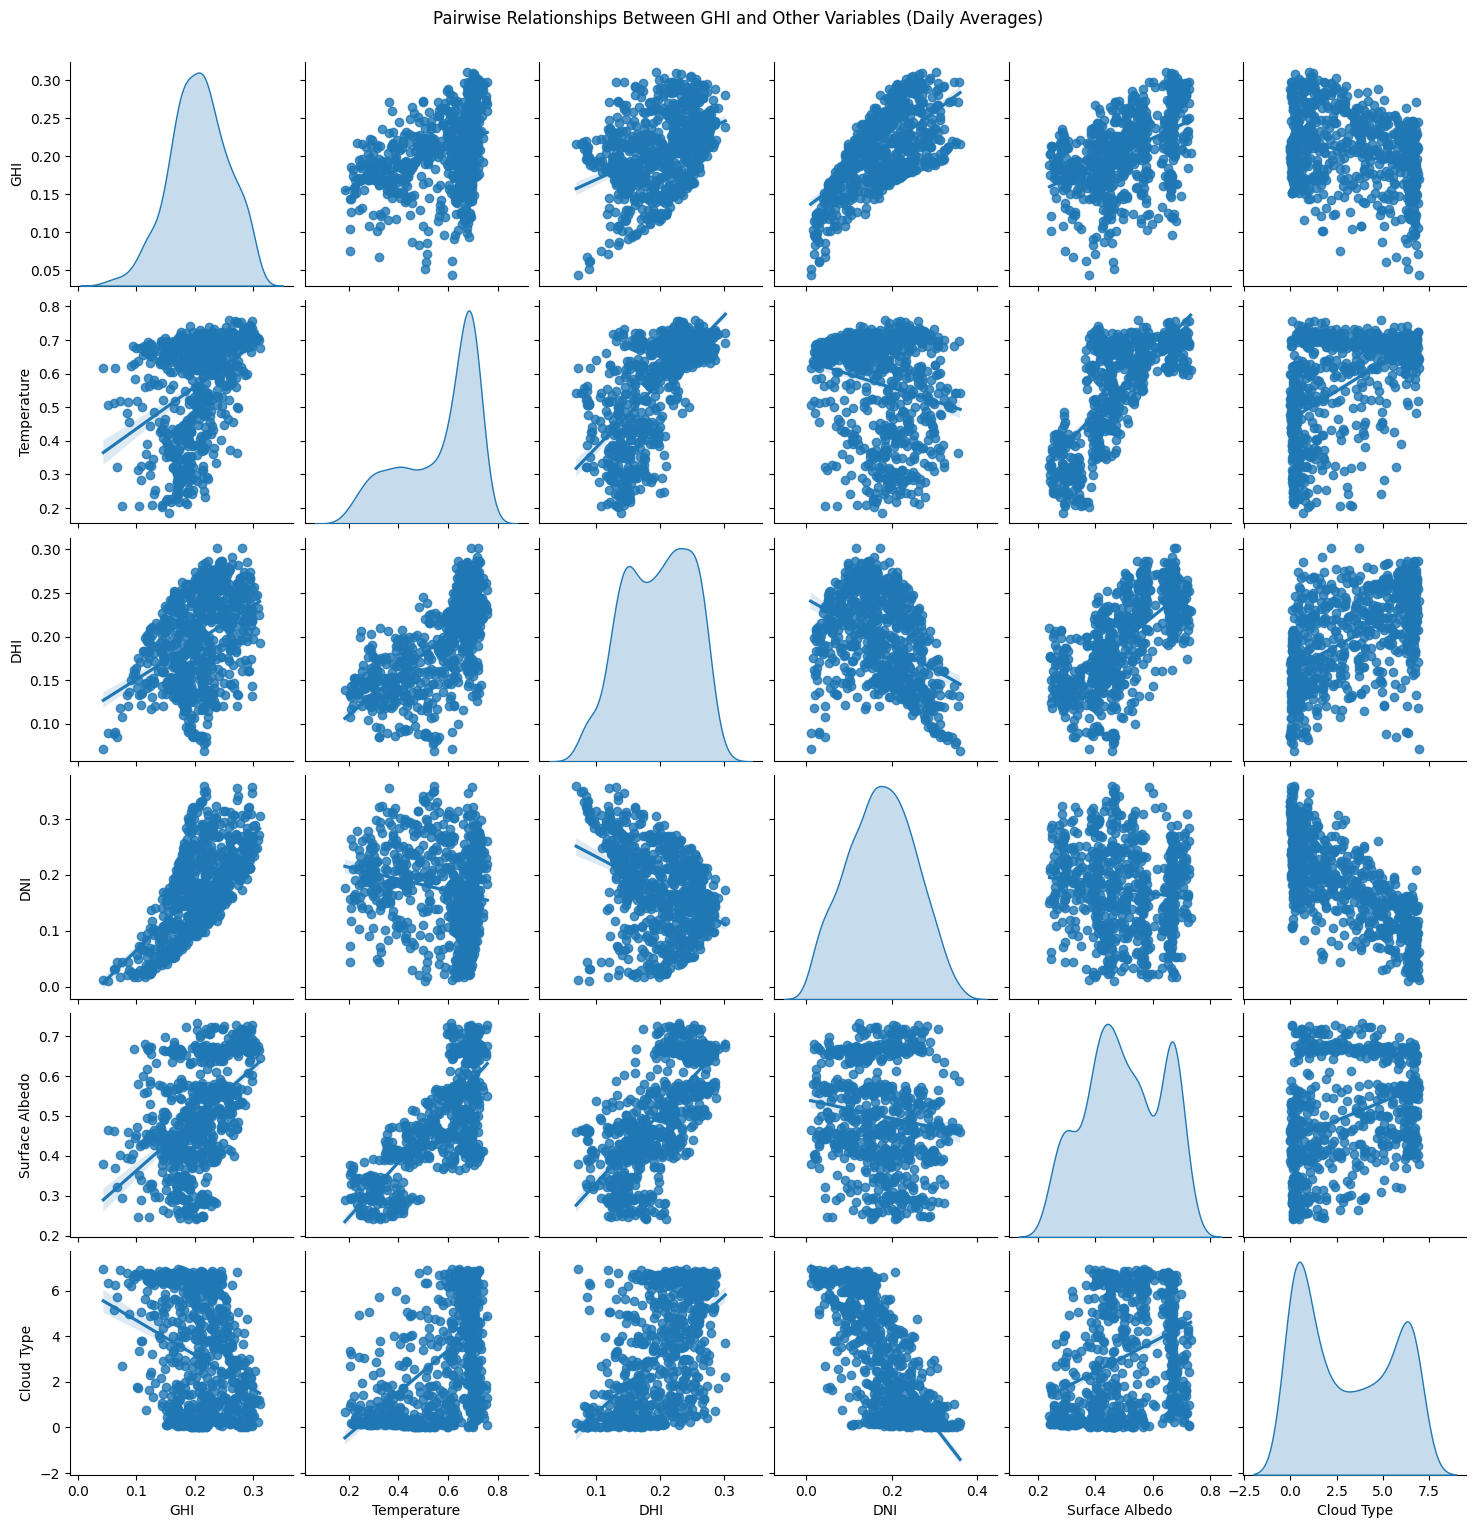

In [28]:
# Example: Aggregate by day, excluding non-numeric columns
df['Date'] = pd.to_datetime(df['DateTime']).dt.date
# Select only numeric columns for the mean calculation
numeric_cols = df.select_dtypes(include=np.number).columns
daily_data = df.groupby('Date')[numeric_cols].mean().reset_index()

sns.pairplot(daily_data, vars=['GHI', 'Temperature', 'DHI', 'DNI', 'Surface Albedo','Cloud Type'], kind='reg', diag_kind='kde')
plt.suptitle('Pairwise Relationships Between GHI and Other Variables (Daily Averages)', y=1.02)
plt.show()

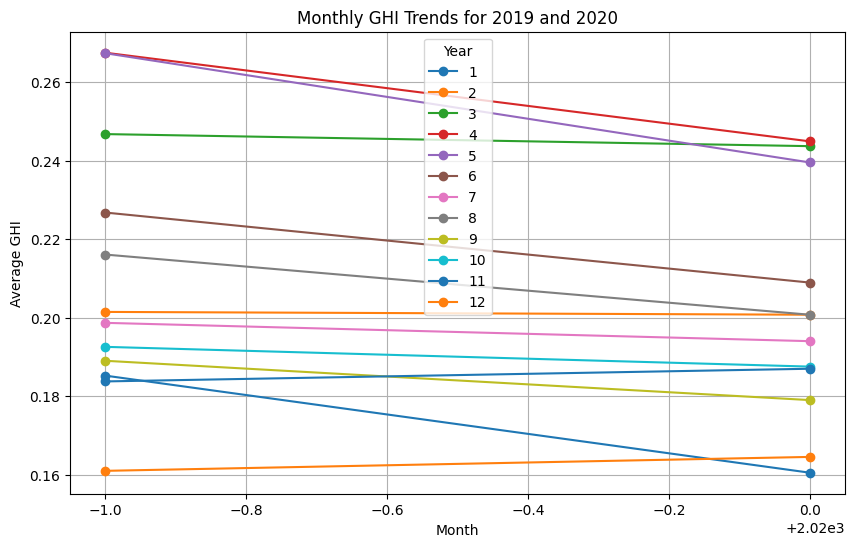

In [13]:
# Monthly trends for GHI
monthly_trends = df.groupby(['Year', 'Month'])['GHI'].mean().unstack()

# Line plot for monthly GHI trends
monthly_trends.plot(figsize=(10, 6), marker='o')
plt.title('Monthly GHI Trends for 2019 and 2020')
plt.xlabel('Month')
plt.ylabel('Average GHI')
plt.legend(title='Year')
plt.grid()
plt.show()

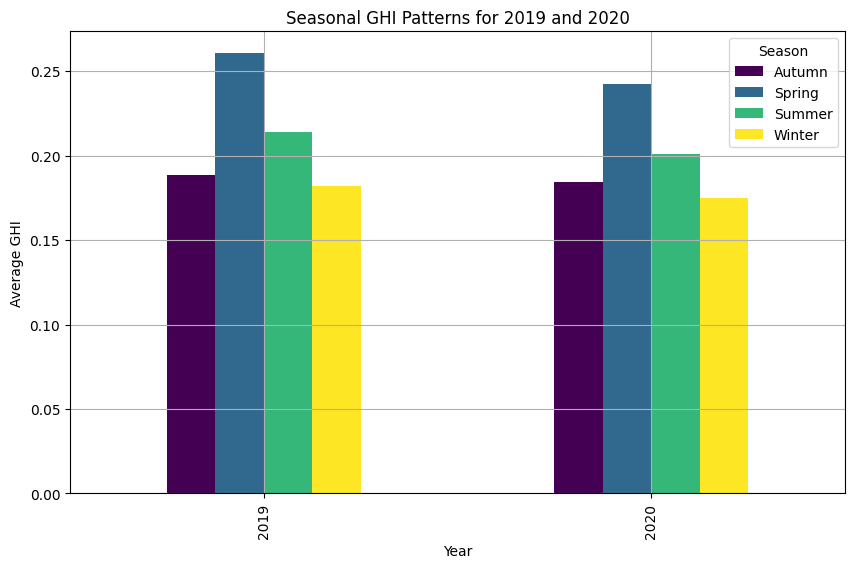

In [14]:
# Group by Year and Season, calculate mean GHI
seasonal_ghi = df.groupby(['Year', 'Season'])['GHI'].mean().unstack()

# Bar plot for seasonal GHI
seasonal_ghi.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Seasonal GHI Patterns for 2019 and 2020')
plt.xlabel('Year')
plt.ylabel('Average GHI')
plt.legend(title='Season')
plt.grid()
plt.show()


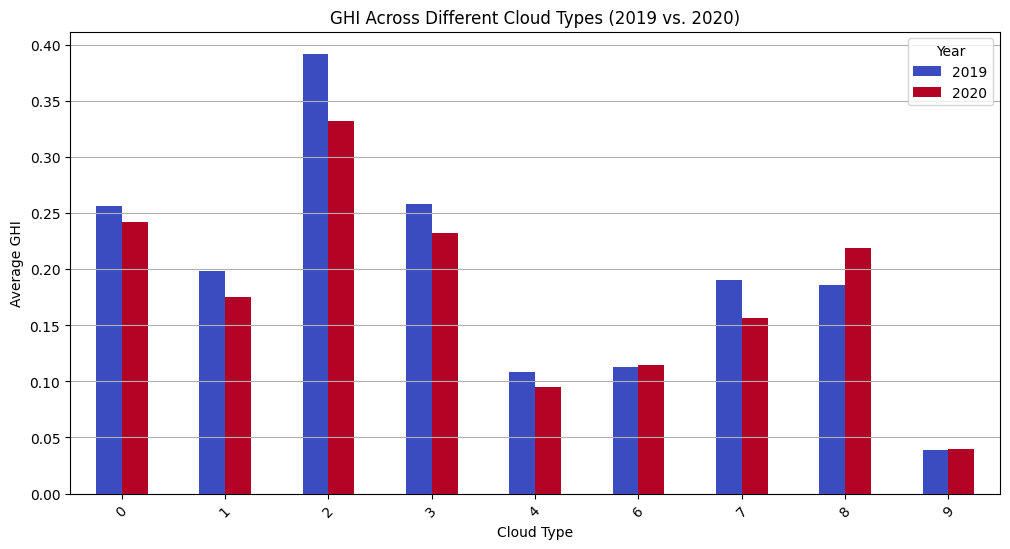

Year            2019      2020
Cloud Type                    
0           0.256358  0.241769
1           0.198614  0.175121
2           0.392090  0.331754
3           0.257736  0.232374
4           0.108593  0.095068
6           0.112784  0.114429
7           0.189913  0.156533
8           0.185406  0.219197
9           0.038678  0.040004


In [22]:
# Group by Cloud Type and Year to analyze GHI
cloud_ghi = df.groupby(['Cloud Type', 'Year'])['GHI'].mean().unstack()

# Plot the results
cloud_ghi.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('GHI Across Different Cloud Types (2019 vs. 2020)')
plt.xlabel('Cloud Type')
plt.ylabel('Average GHI')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display cloud GHI data
print(cloud_ghi)



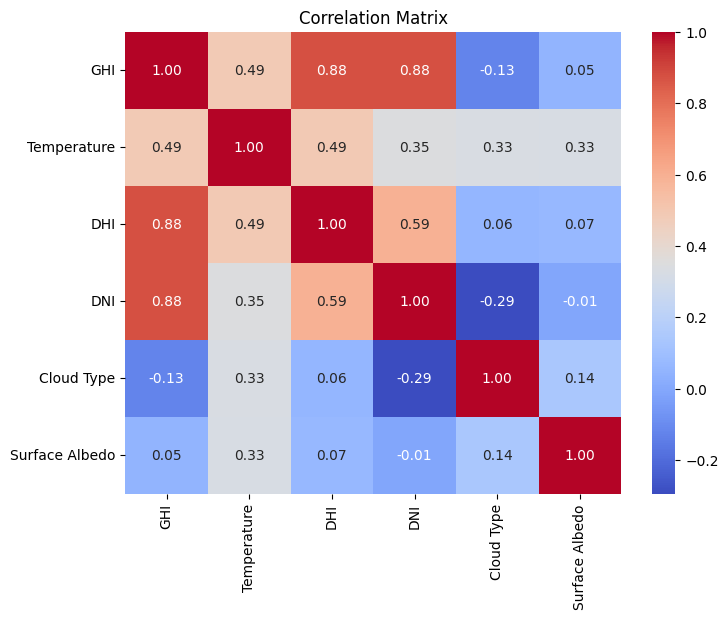

In [17]:
# Correlation heatmap
correlation_matrix = df[['GHI', 'Temperature', 'DHI', 'DNI','Cloud Type','Surface Albedo']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


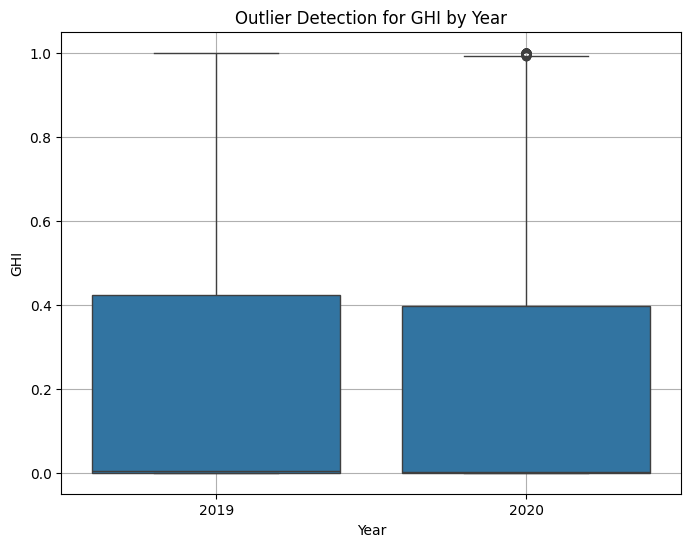

In [23]:
# Boxplot for GHI
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='GHI', data=df)
plt.title('Outlier Detection for GHI by Year')
plt.xlabel('Year')
plt.ylabel('GHI')
plt.grid()
plt.show()


In [24]:
# T-test for GHI between 2019 and 2020
ghi_2019 = df[df['Year'] == 2019]['GHI']
ghi_2020 = df[df['Year'] == 2020]['GHI']
t_stat, p_value = ttest_ind(ghi_2019, ghi_2020, nan_policy='omit')

print(f"T-test Results: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in GHI between 2019 and 2020.")
else:
    print("No significant difference in GHI between 2019 and 2020.")

# ANOVA for GHI across seasons
f_stat, p_value_anova = f_oneway(
    df[df['Season'] == 'Winter']['GHI'],
    df[df['Season'] == 'Spring']['GHI'],
    df[df['Season'] == 'Summer']['GHI'],
    df[df['Season'] == 'Autumn']['GHI']
)

print(f"ANOVA Results: F-statistic={f_stat:.2f}, p-value={p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("There is a significant difference in GHI across seasons.")
else:
    print("No significant difference in GHI across seasons.")


T-test Results: t-statistic=16.45, p-value=0.0000
There is a significant difference in GHI between 2019 and 2020.
ANOVA Results: F-statistic=2673.70, p-value=0.0000
There is a significant difference in GHI across seasons.


In [27]:
# Save cleaned data for future analysis
df.to_csv('/content/drive/My Drive/Cleaned_Dataset.csv', index=False)
print("Processed dataset saved to Google Drive.")


Processed dataset saved to Google Drive.
